## Prep Course Capstone Project - Yelp Dataset Study
May 2018 by Pallavi Walali

The aim of this project is to analyze the Yelp reviews dataset. This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset you'll find information about businesses across 11 metropolitan areas in four countries.

<img src="https://s3-media3.fl.yelpcdn.com/assets/srv0/seo_metadata/f9149736ad8d/assets/img/logos/yelp_og_image.png" style="height:250px;width:100%">

## Data

This dataset contains seven CSV files. The original JSON files can be found in yelp_academic_dataset.zip.

You may find this documentation helpful:
https://www.yelp.com/dataset/documentation/json

In total, there are :

- 5,200,000 user reviews
- Information on 174,000 businesses
- The data spans 11 metropolitan areas

The dataset was converted from JSON to CSV format and we thank the team of the Yelp dataset challenge for creating this dataset.

By downloading this dataset, you agree to the [Yelp Dataset Terms of Use](https://s3-media2.fl.yelpcdn.com/assets/srv0/engineering_pages/af4b9cebfb4f/assets/vendor/dataset-challenge-dataset-agreement.pdf).


## What Can We Determine from the Data?

After analysing data many questions could be addressed. Those are as follows:
    1. what are different states where people are more social and interactive to share their reviews?
    2. What kind of users gave most reviews for different businesses around the world?
    3. which one is the most used star ratings for business reviews?
    4. what are the different categories of businesses people reviewed often and what percentage of reviews are funny and which category does it belong to? 
    5.what is the most busy day of week for business as well as when people have made maximum checkins?
    

**Import Modules**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import *
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.gridspec as gridspec 

plt.style.use(['ggplot'])
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


In [3]:
#Import raw data
business = pd.read_csv("/Users/saurabh/Documents/Capstone_1/yelp_business.csv")
business_hours=pd.read_csv("/Users/saurabh/Documents/Capstone_1/yelp_business_hours.csv")
check_in=pd.read_csv("/Users/saurabh/Documents/Capstone_1/yelp_checkin.csv")
reviews=pd.read_csv("/Users/saurabh/Documents/Capstone_1/yelp_review.csv")
user=pd.read_csv("/Users/saurabh/Documents/Capstone_1/yelp_user.csv")

In [5]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376
std,5.389012,26.240079,1.003739,98.208174,0.366258
min,-36.086009,-142.466650,1.000000,3.000000,0.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000


In [6]:
business.head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


###  What are different states where people are more social and interactive to share their reviews

Let us first analyze what are the different regions or states where Yelp has most of its business or presence. Review count may help us to conclude something so lets figure out that 

In [151]:
#Get the distribution of the ratings as per states
business_by_reviews = business.groupby(['state']).sum().reset_index()
df = business_by_reviews.drop(business_by_reviews.index[[0,1,2,3]])
df

,state,latitude,longitude,stars,review_count,is_open
4,AB,4.365520e+01,-7.939996e+01,5.0,3,1
5,ABE,1.575713e+02,-6.353633e+00,12.0,12,3
6,AK,3.327682e+01,-1.117910e+02,2.5,22,1
7,AL,3.626246e+01,-1.151820e+02,5.0,10,1
8,AR,6.689608e+01,-2.235435e+02,6.5,30,2
9,AZ,1.748840e+06,-5.847391e+06,194691.5,1627693,44045
10,B,-3.441803e+01,-5.857255e+01,2.5,6,1
11,BW,1.520837e+05,2.859738e+04,11867.5,35398,2746
12,BY,1.955742e+02,4.337857e+01,16.5,15,3
13,C,-9.662812e+02,-1.637639e+03,100.0,202,27


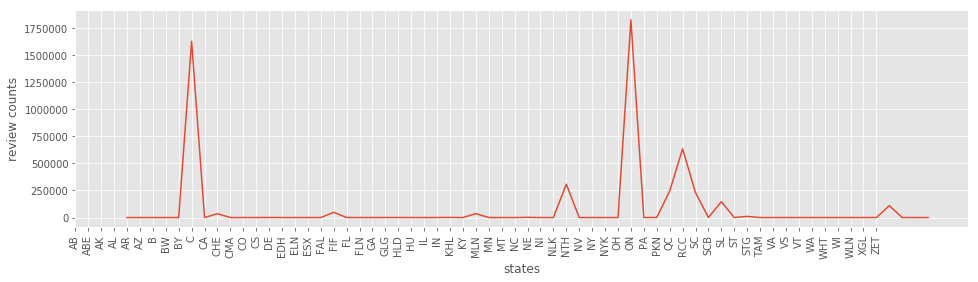

In [152]:
#Get the distribution of the review counts as per states
x = np.arange(len(df['state']))
plt.figure(figsize=(16,4))
plt.plot(df['review_count'])
plt.ylabel('review counts')
plt.xlabel('states')
plt.xticks(x, df['state'],rotation='vertical')
plt.show()

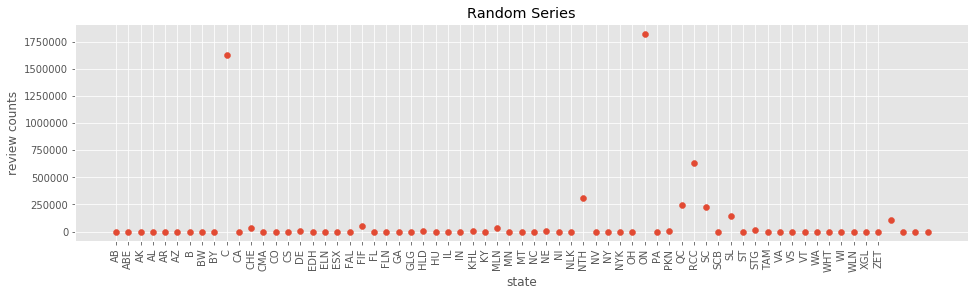

In [9]:
#Get the distribution of the review counts as per states
x = np.arange(len(df['state']))
plt.figure(figsize=(16,4))
plt.scatter(x=business_by_reviews['state'], y=business_by_reviews['review_count'])
plt.ylabel('review counts')
plt.xlabel('states')
plt.xticks(x, df['state'],rotation='vertical')

plt.title('Random Series')# plt.figsize
plt.show()

** The graph above helps to analyze the data as per the reviews given by each region** 

- It looks like people from Ontario Canadian province are most social and interactive to share their reviews 
- We can also observe that people from North America and Europe regions are comparitively less social and writing less reviews but helping the growth of different categories of businesses by writing reviews
- The presence of Yelp business is worldwide but most concentrated in the North American Region

### Which cities have the most businesses reviewed by Yelp and why those cities have higher ratings compared to others?

Let us analyze the data for finding out what kind of cities around the world are reviewed most and why businesses at those cities received maximum ratings compared to others

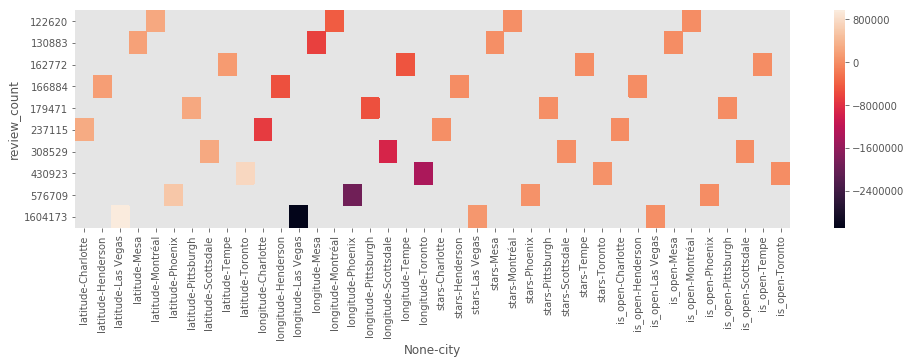

In [5]:
#Get the distribution of the review counts as per cities
business_data_top = business.groupby(['city']).sum().reset_index()
business_data_top = business_data_top.sort_values([('review_count')],ascending=False)
business_data_top = business_data_top.head(10)
plt.figure(figsize=(16,4))
result = business_data_top.pivot('review_count','city')
sns.heatmap(result)
plt.show()

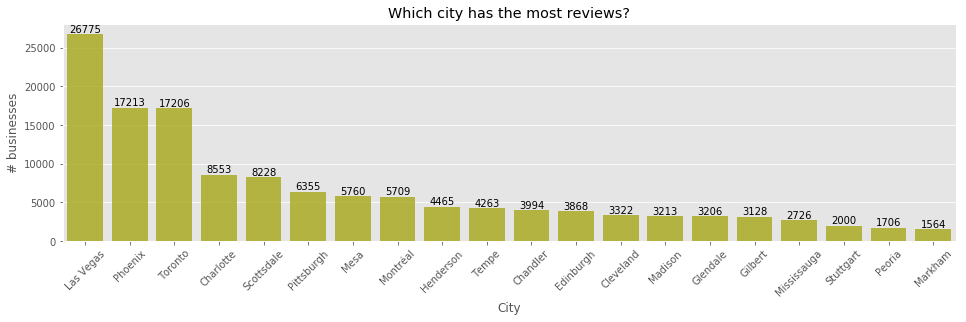

In [6]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color='y')
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**The above heatmap analysis helps us to draw few conclusions which can be helpful for growth of businesses**
- Las Vegas has maximum number of Yelp reviews compared to any other cities in the world. This may be because Las Vegas is a popular tourist destination. People are more interested to know what are different options available around the city also share their reviews regarding services they received so others will have advatange over them
- Many people visit Las Vegas every now and then for entertainment or business so more reviews on variety of business specially restaurants, casinos located around the city
- Yelp reviews somehow helping Las Vegas to grow its business more diversley!
- Phoenix and Toronto both have less Yelp reviews compared to vegas may be because they are not as popular as vegas but still have more reviews compared to other cities around the world as they are populated so more and better business around the cities!

### What kind of users gave most reviews for different businesses around the world

Let us analyze top 10 users who gave most reviews which might be valuable for growth of a business in different categories located at different regions over the world

In [20]:
user_agg=reviews.groupby('user_id').count().reset_index()

In [21]:
#Get the distribution of top 10 users of Yelp!
print("Top 10 Users in Yelp")
user_agg['review_id_count'] = user_agg['review_id']
df_user = user_agg[['user_id','review_id_count','useful']].sort_values([('review_id_count')],ascending=False)
df_userreview_count = df_user.head(10)
df_userreview_count

Top 10 Users in Yelp


,user_id,review_id_count,useful
289323,CxDOIDnH8gp9KXzpBHJYXw,3569,3569
815720,bLbSNkLggFnqwNNzzq-Ijw,2077,2077
545793,PKEzKWv_FktMm2mGPjwd0Q,1611,1611
297106,DK57YibC5ShBmqQl97CKog,1463,1463
566269,QJI9OSEn6ujRCtrX06vs1w,1322,1322
862227,d_TBs6J3twMy9GChqUEXkg,1184,1184
318306,ELcQDlf69kb-ihJfxZyL0A,1159,1159
836720,cMEtAiW60I5wE_vLfTxoJQ,1126,1126
943526,hWDybu_KvYLSdEFzGrniTw,1117,1117
644501,U4INQZOPSUaj8hMjLlZ3KA,1101,1101


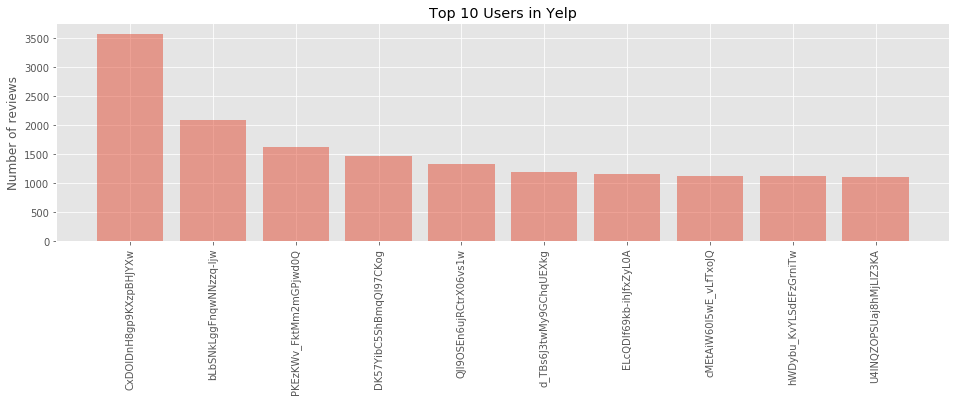

In [12]:
#Plotting top 10 users of Yelp!
x = np.arange(10)
y1 = df_userreview_count['review_id_count']
plt.figure(figsize=(16,4))
p1=plt.bar(x, y1, align='center', alpha=0.5)
plt.xticks(x, df_userreview_count['user_id'],rotation='vertical')
plt.ylabel("Number of reviews")
plt.title("Top 10 Users in Yelp")
plt.show()

**This graph help us to analyze**
- Top 10 users of Yelp have written more than 1000 reviews overall
- These are the users who gave most useful reviews that helps to grow respective businesses as people get better idea about quality of service particular business is providing   
- These are the users who trusted Yelp business most so their reviews are more meaningful for Yelp
- These users have spend more time on writing reviews compared to other users of Yelp so they might really want to create awareness about different business and make a difference

### What  is most frequently used star ratings for business reviews?

Let us analyze data for finding out what are the different ratings people prefer to give to the variety of business around the world and also check will that knowledge contribute to the growth of any business. For instance if particular restaurant received more 5 star ratings compared to other star ratings (1,2,3 or 4)then it helps people to derive conclusion that overall this place is good and we will have better experience similarly if some medical center is poorly rated like having 2 or 1 star that will help people realize that this may not be good center to visit

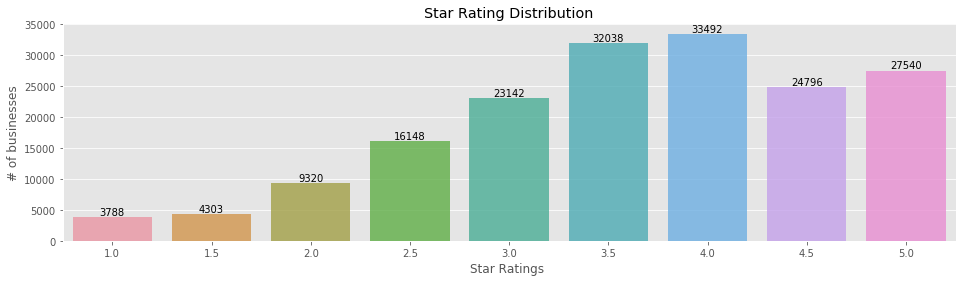

In [13]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


plt.show()

**The graph helps to analyze**
- From the ratings given by people to different businesses,we can generalize that majority of businesses got 4 star rating. 
- Many receive star ratings between 3 and 5
- very few businesses receive 1 star rating may be people are more inclined to write reviews if they are happy and satisfied with the services and less inclined to write anything if they had bad experience. 
- It can also be seen from these graph that nowadays businesses are more customer focused so they tend to provide better services to the customers so more customers are happy!

### What are the different categories of businesses people reviewed often?

Let us analyze data fo finding out different categories of business people like to review often that will give us overview of what are the growing businesses in the economy around world

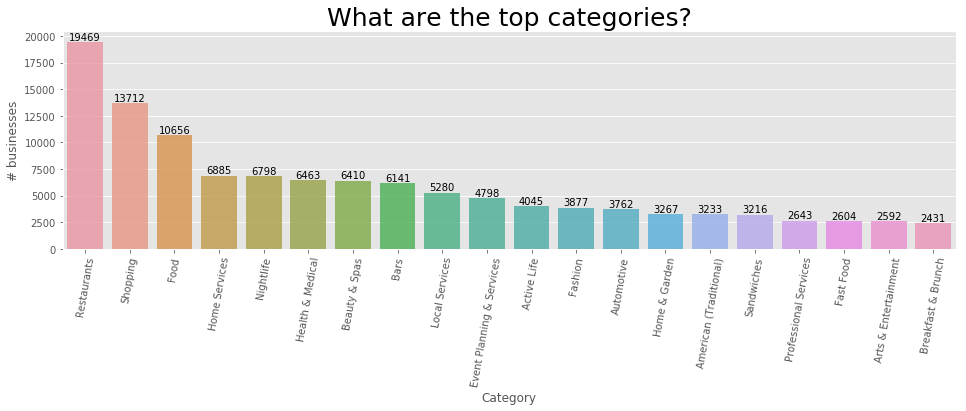

There are  20  different types/categories of Businesses in Yelp!


In [13]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")


**We can analyze data above as **
- Restaurants topped the chart, It is one of the hit businesses everywhere and people love to write about their food experiences more often. 
- Shopping is next popular experience people wanted to share more often it may be good or bad.
- Breakfast& Brunch are not reviewed as often as Beauty & Spas or Health & Medical
- Home services are more reviewed compared to Local Services

### What is the most busy day of a week for business and when people have made maximum checkins?

Let us analyze data for finding out when users like to spend more time on Yelp during week or weekends? also are they visiting for writing different reviews or checking reviews written by some other users before visiting any restaurant or shopping mall

In [15]:
#checkins exploration
df=check_in.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
df


weekday,hour,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0:00,178666,163336,224425,225209,171669,156195,166254
1,10:00,11837,10432,16753,15903,9776,9448,9200
2,11:00,15617,14580,15833,13724,14791,14397,14568
3,12:00,26149,23655,21330,16856,24631,24994,24828
4,13:00,37355,33640,36613,28085,34514,35002,34519
5,14:00,56684,48243,63294,49652,51012,50415,51139
6,15:00,79148,66663,103651,86110,70076,67864,69115
7,16:00,106798,88219,149504,129330,91269,86936,89414
8,17:00,119295,100422,188682,171205,99254,95791,97497
9,18:00,156740,131296,225651,205088,131839,126253,128179


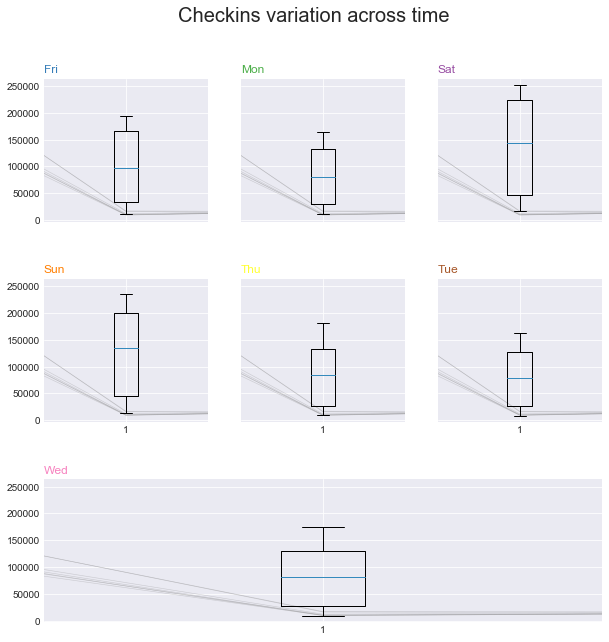

In [16]:
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the boxplot
    plt.boxplot(df[column])
    # Same limits for everybody!
    #plt.xlim(0,24)
    #plt.ylim(-2,260000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

**The graph analysis indicates that** 
- weekends are most busy as there are lot of checkins happen on sat and sun compared to rest of the week
- saturday seems most busy among weekends
- over weekdays Friday seems little more rush as checkins are more compared to other days of week
- mostly on Saturdays on an average around 150000 checkins happens through different business
- Many people like to visit Yelp during their free time as weekends are more relaxing wheather to write reviews for some retaurant or check reviews before visiting any fast food center or medical service so they will have better experience when they visit

### t-test on Population Samples From above average and below average star ratings Populations


To examine whether the review with different star ratings has any cool comments or funny comments we define two datasets one which contains all reviews with atleast one cool comment and other which contains atlas one funny comment.We will sample these datatsets and perform a t-test on the data in order to assess whether the difference in their means reflects a statistically significant difference between the populations.

In [2]:
tbl_review1 = reviews[reviews['cool'] > 0]
tbl_review2 = reviews[reviews['funny'] > 0]

In [5]:
tbl_review1.head(5)
#tbl_review2.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
11,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,2011-09-28,Server was a little rude.\n\nOrdered the calam...,5,0,1
12,x5oV6wm9_Pb1QQ6jkjDjwQ,u0LXt3Uea_GidxRW1xcsfg,13nKUHH-uEUXVZylgxchPA,1,2011-02-16,I thought Tidy's Flowers had a great reputatio...,9,0,1
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
14,23eqwlZzCWZkADWfd9atZw,u0LXt3Uea_GidxRW1xcsfg,Aov96CM4FZAXeZvKtsStdA,5,2010-07-16,This place is awesome! Definitely authentic!!!...,2,0,1


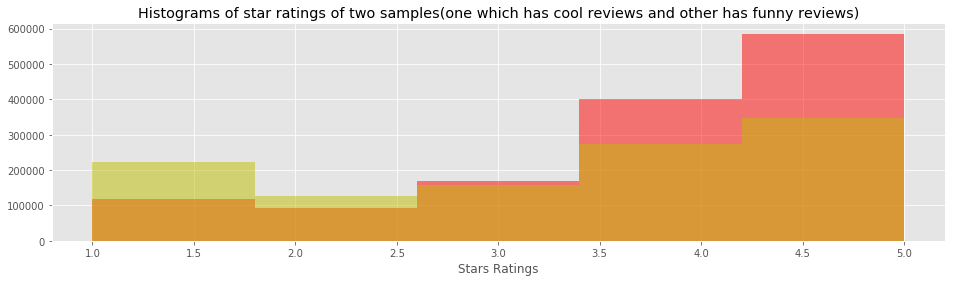

In [6]:
#reviews_temp = reviews


plt.figure(figsize=(16,4))

plt.hist(tbl_review1['stars'], bins=5, color='r', alpha=0.5)
plt.hist(tbl_review2['stars'], bins=5, color='y', alpha=0.5)
plt.xlabel('Stars Ratings')
#plt.axvline(tbl_above_avg['stars'].mean(), color='b', linestyle='solid', linewidth=2)
#plt.axvline(tbl_below_avg['stars'].mean(), color='b', linestyle='solid', linewidth=2)

plt.title('Histograms of star ratings of two samples(one which has cool reviews and other has funny reviews)')
plt.show()

**The graph above helps us to realize**
- There are more reviews which are cool compared to funny
- Funnier reviews are more inclined towards higher star ratings
- Lower star rating reviews are cool rather than funny
- Overall both cool and funny reviews indicate that mostly reviews are positive and on lighter note not very serious

In [8]:
#Sample the two populations of interest (star rating below 3 am and above 3)

sample1 = np.random.choice(tbl_review1['stars'], 100)
sample2 = np.random.choice(tbl_review2['stars'], 100)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample1.mean( ) -sample2.mean()
print(diff)


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5 

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)


from scipy.stats import ttest_ind
print(ttest_ind(sample1, sample2, equal_var=False))

3.81
3.42
1.2385071659057931
1.4503792607452715
0.3900000000000001
2.044857769862998
Ttest_indResult(statistic=2.034607791683543, pvalue=0.04325644157347597)


### Analysis of star ratings given for reviews, t-test Results

The p-value of 0.043 for this t-test falls just below the threshold for statistical significance. Recall what we are looking at: the number of reviews with different star ratings has atleast one cool or funny comment in two samples taken from two populations at different star ratings. Thus,The p-value of 0.043 in the test did above indicates that the difference in sample means we see is due to a real difference in the population and not due to variability in the samples.

### Closing Remarks

A study of this nature tends to raise as many questions as it answers. A number of questions arose during project that would be an interesting focus for further investigation. These include, but are not limited to:

- What time of day there is more network trafic for accessing the Yelp website?
- What are the top cities where Yelp business is reviewd more?
- What is the global view of Yelp business looks like?
- Finding positive or negative reviews for particular business
- How many people still trust Yelp reviews in the modern world! 